# Kmeans
Source: http://stanford.edu/~cpiech/cs221/handouts/kmeans.html

K-Means is one of the most popular "clustering" algorithms.K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.
## The Algorithm
In the clustering problem, we are given a training set $x^{(1)},...,x^{(m)}$, and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point $x^{(i)}∈R^n$ as usual; but no labels $y^{(i)}$ (making this an unsupervised learning problem). Our goal is to predict $k$ centroids and a label $c^{(i)}$ for each datapoint. The k-means clustering algorithm is as follows:
1. Initial cluster centroids ${u_1},...,{u_k}∈R^n$ randomly.
2. Repeat until Convergence:
    
    (1) For every $i$, set $c^{(i)}:=arg{min}_j{||x^{(i)}-u_j||}^2$
    
    (2) For each $j$, set $u_j:=\frac{\sum_{i=1}^m {1{(c^{(i)}=j)}x^{(i)}}}{\sum_{i=1}^m {1{(c^{(i)}=j)}}}$

<img src="./kmeans_image/1.png" weight=640 height=320 />
<img src="./kmeans_image/2.png" weight=640 height=320 />
<img src="./kmeans_image/3.png" weight=640 height=320 />
<img src="./kmeans_image/4.png" weight=640 height=320 />
<img src="./kmeans_image/5.png" weight=640 height=320 />
<img src="./kmeans_image/6.png" weight=640 height=320 />

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# calculate Euclidean distance
def euclDistance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector2 - vector1, 2)))

In [3]:
# init centroids with random samples  
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape
    index = np.random.uniform(0, numSamples, k).astype(int)
    centroids = dataSet[index]
    return centroids

In [4]:
# show your cluster (only available with 2-D data) 
def showCluster(dataSet, k, centroids, clusterAssment):  
    numSamples, dim = dataSet.shape
    if dim != 2:
        print ("Sorry! I can not draw because the dimension of your data is not 2!")  
        return 1  
  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):
        print ("Sorry! Your k is too large!")  
        return 1

    # draw all samples
    for i in range(numSamples):
        # assign colors for samples
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  

    plt.show()

In [5]:
# k-means cluster
def kmeans(dataSet, k):  
    numSamples = dataSet.shape[0]
    # store which cluster this sample belongs to
    clusterAssment = np.zeros([numSamples, 1])
    clusterChanged = True

    ## step 1: init centroids
    centroids = initCentroids(dataSet, k)

    epoch = 0
    while clusterChanged:
        clusterChanged = False
        ## for each sample
        for i in range(numSamples):
            minDist  = float('inf')
            minIndex = 0
            # for each centroid
            # step 2: find the centroid who is closest  
            for j in range(k):  
                distance = euclDistance(centroids[j, :], dataSet[i, :])  
                if distance < minDist:  ######对于每一个点 计算每一个点到k个集群中心的距离 并记录下该点距离最近的集群中心的J
                    minDist  = distance  
                    minIndex = j  
              
            ## step 3: update its cluster ######
            if clusterAssment[i, 0] != minIndex:######判断该点是否需要继续划分
                clusterChanged = True
                clusterAssment[i, :] = minIndex
        ##### 每一个点均已重新分配到某一类
        ## step 4: update centroids
        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0] == j)[0], :]#####np.nonzero函数是numpy中用于得到数组array中非零元素的位置（数组索引）的函数
            ####上一行代码得到数据第j个聚类中心的点
            centroids[j, :] = np.mean(pointsInCluster, axis=0)#####重新得到聚类中心
        
        if epoch < 5:
            print('epoch: ' + str(epoch))
            showCluster(dataSet, k, centroids, clusterAssment)
        epoch = epoch + 1
np.nan        
    print ('Congratulations, cluster complete!')
    return centroids, clusterAssment

In [6]:
# k-means cluster
def kmeans_simple(dataSet, k):
    numSamples = dataSet.shape[0]
    clusterChanged = True
    clusterAssment = np.zeros([numSamples, 1])
    
    ## step 1: init centroids
    centroids = initCentroids(dataSet, k)

    while clusterChanged:
        clusterChanged = False
        # calculate pairwise distance
        distance = cdist(dataSet, centroids)

        # find the closest centroid for each sample
        tmpIndex = np.reshape(np.argmin(distance, 1), [-1, 1])
        
        # if any index changes, continue
        if (tmpIndex != clusterAssment).any():
            clusterChanged = True

        # update clusterAssment
        clusterAssment = tmpIndex

        # update centroids
        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment == j)[0], :]
            centroids[j, :] = np.mean(pointsInCluster, 0)

    print ('Congratulations, cluster complete!')  
    return centroids, clusterAssment

In [7]:
def customReadFile(fileName):
    fileIn = open(fileName, 'r')
    dataSet = []
    for line in fileIn.readlines():
        temp=[]
        lineArr = line.strip().split('\t')
        temp.append(float(lineArr[0]))
        temp.append(float(lineArr[1]))
        dataSet.append(temp)
    fileIn.close()
    return np.mat(dataSet)

Step 1: Load data ../input/testSet.txt...
Number of samples: 80
Step 2: clustering...
epoch: 0


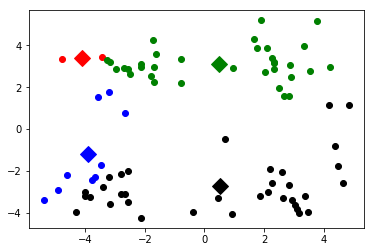

epoch: 1


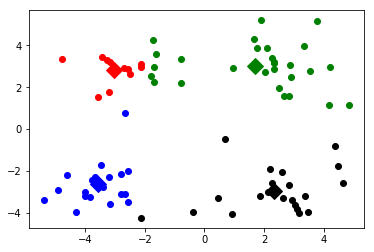

epoch: 2


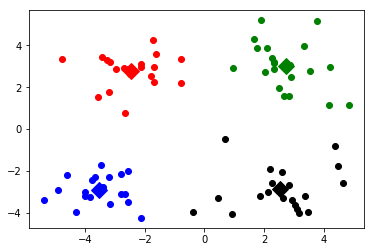

epoch: 3


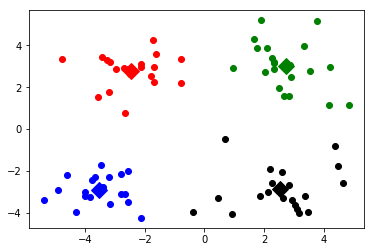

Congratulations, cluster complete!
Step 3: show the result...


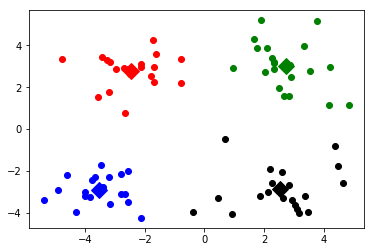

In [8]:
## step 1: load data
fileIn = '../input/testSet.txt'
print ('Step 1: Load data ' + fileIn + '...')
dataSet = customReadFile(fileIn)
print('Number of samples: ' + str(dataSet.shape[0]))

## step 2: clustering...  
print ("Step 2: clustering..."  )
k = 4
centroids, clusterAssment = kmeans(dataSet, k)
# centroids, clusterAssment = kmeans_simple(dataSet, k)
# clusteringResult = KMeans(n_clusters=k).fit(dataSet)
# clusterAssment = np.reshape(clusteringResult.labels_, [-1, 1])
# centroids = clusteringResult.cluster_centers_

## step 3: show the result
print ("Step 3: show the result..."  )
showCluster(dataSet, k, centroids, clusterAssment)

# PlayGround
http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html
# Code
https://github.com/wojiushimogui/kmeans